In [2]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

Matplotlib is building the font cache; this may take a moment.


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
data = pd.read_csv('loan_approval_dataset.csv')

In [6]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [9]:
# delete the spaces in column names
data.columns = data.columns.str.strip()
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [10]:
scaler = MinMaxScaler()
for i in data.columns[data.dtypes=='int64']:
    data[i] = scaler.fit_transform(data[[i]])
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.000000,0.4,Graduate,No,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,Approved
1,0.000234,0.0,Not Graduate,Yes,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,Rejected
2,0.000469,0.6,Graduate,No,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,Rejected
3,0.000703,0.6,Graduate,No,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,Rejected
4,0.000937,1.0,Not Graduate,Yes,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,Rejected


In [11]:
label_encoder = LabelEncoder()
for i in data.columns[data.dtypes=='object']:
    data[i] = label_encoder.fit_transform(data[i])
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.000000,0.4,0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0
1,0.000234,0.0,1,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1
2,0.000469,0.6,0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1
3,0.000703,0.6,0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1
4,0.000937,1.0,1,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1


In [12]:
corr_matrix = data.corr()
corr_matrix

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,1.000000,0.005326,-0.015536,0.001745,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,-0.017685
no_of_dependents,0.005326,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.018114
education,-0.015536,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,0.004918
self_employed,0.001745,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,-0.000345
income_annum,0.012592,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.015189
loan_amount,0.008170,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,-0.016150
loan_term,0.009809,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,0.113036
cibil_score,0.016323,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.770518
residential_assets_value,0.020936,0.007376,-0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.014367
commercial_assets_value,0.018595,-0.001531,0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.008246


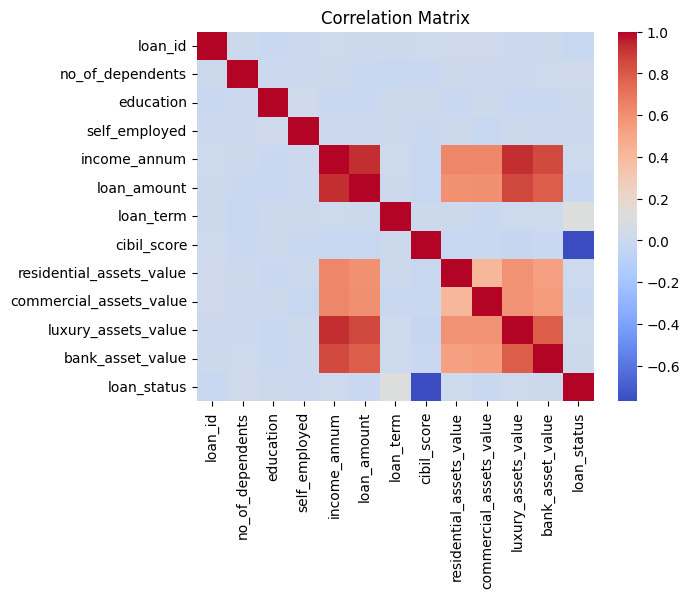

In [13]:
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
data.corr()['loan_status'].sort_values()

cibil_score                -0.770518
loan_id                    -0.017685
loan_amount                -0.016150
commercial_assets_value    -0.008246
self_employed              -0.000345
education                   0.004918
bank_asset_value            0.006778
residential_assets_value    0.014367
income_annum                0.015189
luxury_assets_value         0.015465
no_of_dependents            0.018114
loan_term                   0.113036
loan_status                 1.000000
Name: loan_status, dtype: float64

In [15]:
# drop columns with low correlation to the target
data_no_cibil = data.copy()
data.drop(['commercial_assets_value', 'self_employed', 'loan_id', 'education', 'bank_asset_value', 'residential_assets_value'], axis='columns', inplace=True)
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,luxury_assets_value,loan_status
0,0.4,0.969072,0.755102,0.555556,0.796667,0.575835,0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.218509,1
2,0.6,0.917526,0.750000,1.000000,0.343333,0.848329,1
3,0.6,0.824742,0.775510,0.333333,0.278333,0.591260,1
4,1.0,0.989691,0.609694,1.000000,0.136667,0.748072,1


In [16]:
data_no_cibil.drop(['cibil_score'], axis='columns', inplace=True)

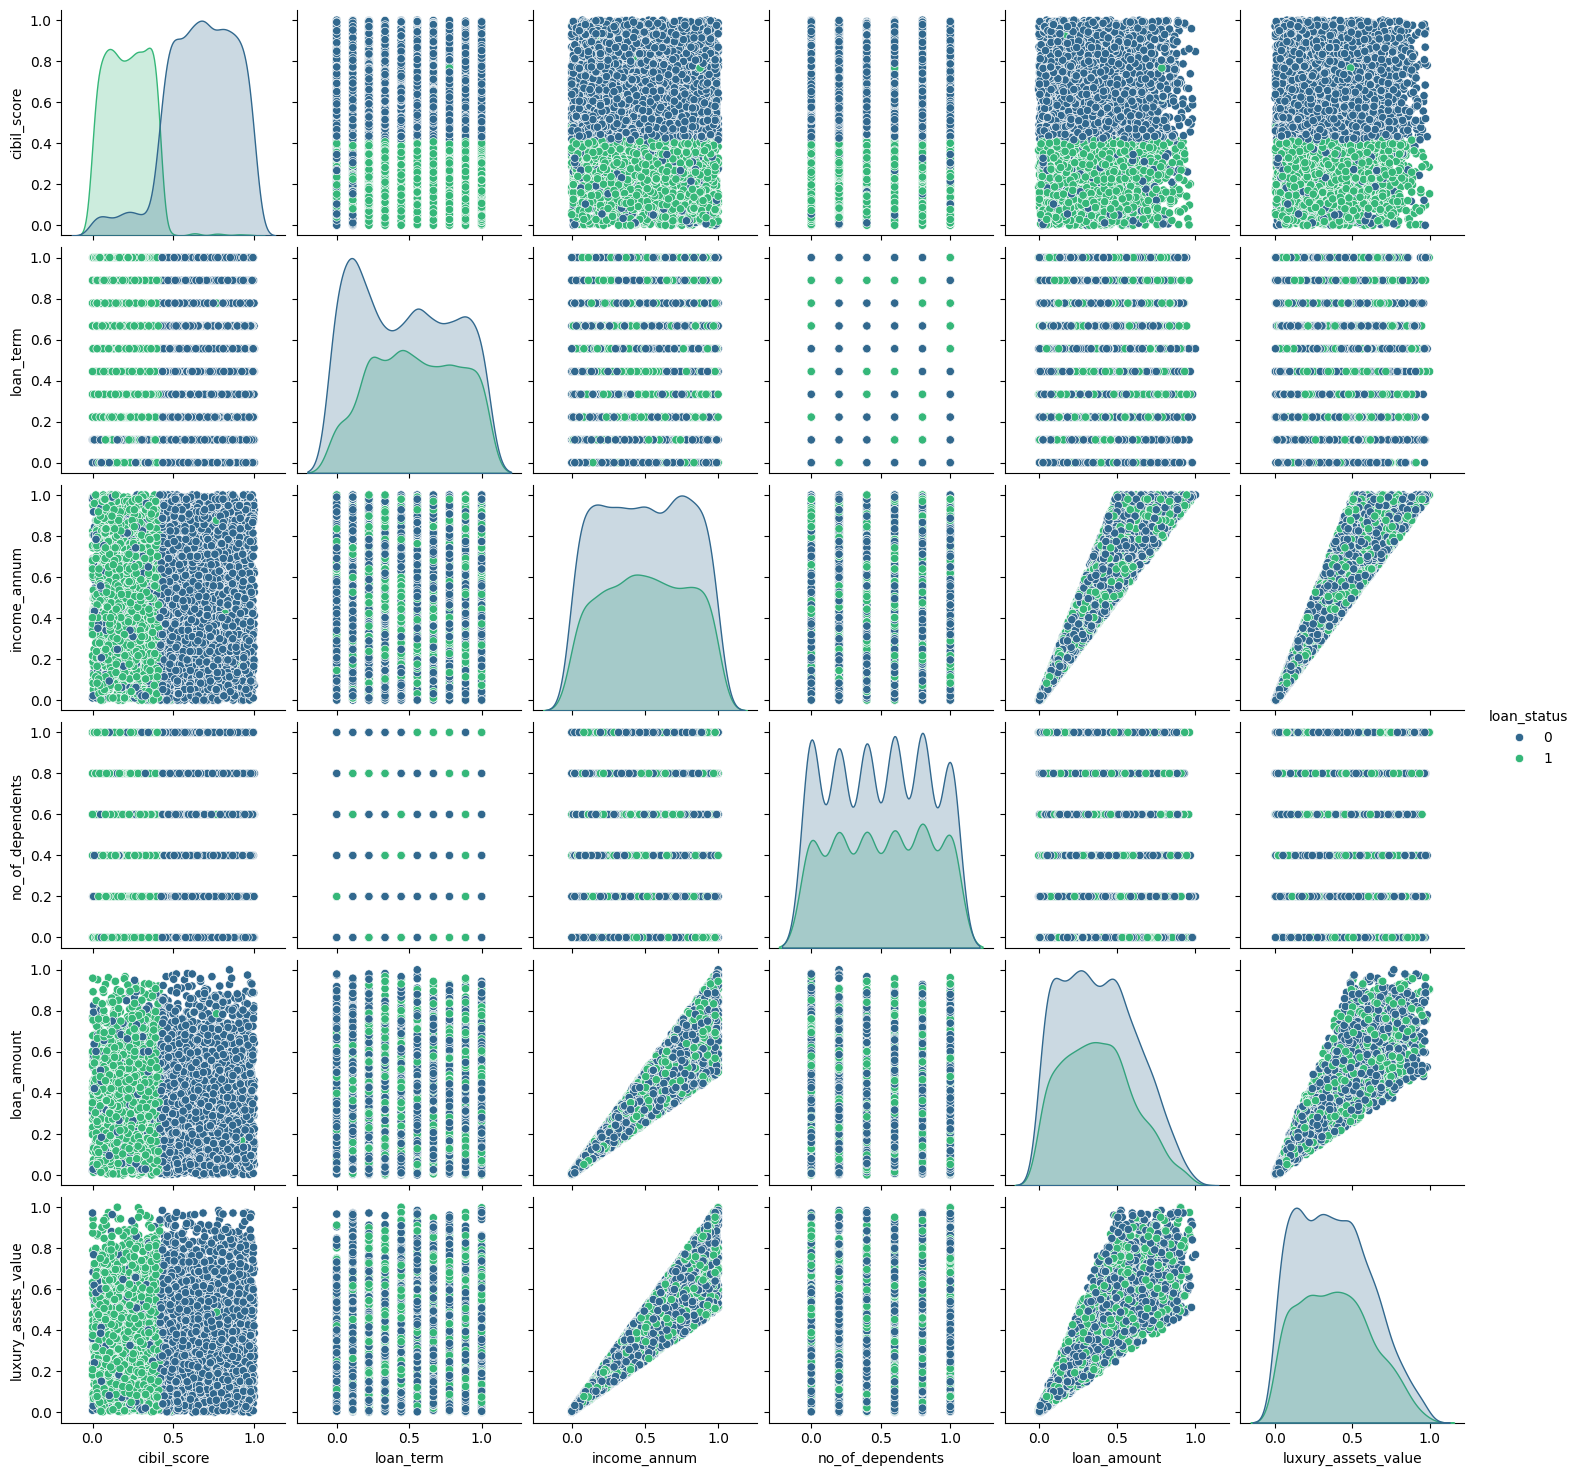

In [17]:
key_features = ['loan_status', 'cibil_score', 'loan_term', 'income_annum', 'no_of_dependents', 'loan_amount', 'luxury_assets_value']
sns.pairplot(data[key_features], hue='loan_status', palette='viridis')
plt.show()

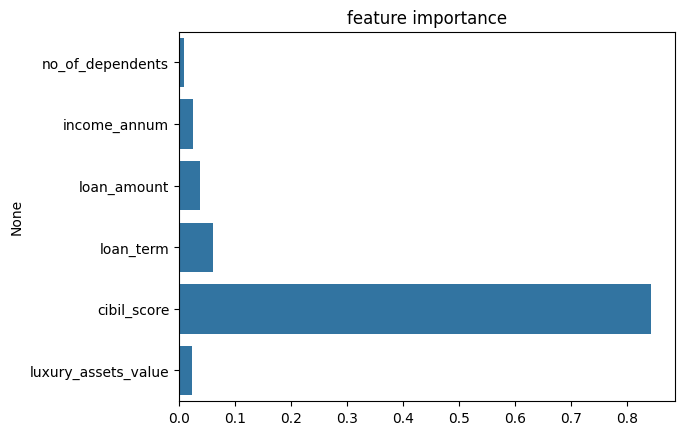

In [18]:
# feature importance based on the random forest
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns='loan_status')
y = data['loan_status']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importance = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importance, y=feature_names)
plt.title('feature importance')
plt.show()

In [19]:
# preparing and splitting data
X = data.drop(columns=['loan_status'])
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train the model
gradient_boosting.fit(X_train, y_train)

# Make predictions
y_pred_gb = gradient_boosting.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Perform 5-fold cross-validation
gradient_boosting_cv = cross_val_score(gradient_boosting, X_train, y_train, cv=5, scoring='accuracy')

# Print mean accuracy
print(f"Gradient Boosting accuracy: {np.mean(gradient_boosting_cv):.4f}")


Gradient Boosting accuracy: 0.9783


In [23]:
# random forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.99      0.96      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [24]:
# random forest with cross validation
random_forest_cv = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')

print(f"random forest accuracy: {np.mean(random_forest_cv):.4f}")

random forest accuracy: 0.9818


In [25]:
# logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       536
           1       0.89      0.88      0.88       318

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



In [26]:
# logistic regression with cross validation
log_reg_cv = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

print(f"logistic regression accuracy: {np.mean(log_reg_cv):.4f}")

logistic regression accuracy: 0.9174


In [24]:
# models perform rather well, most probably due to simple data and one highly correlated feature (cibil_score)
# for the purpose of the project we'll test the models without this one feature

In [27]:
data_no_cibil.corr()['loan_status'].sort_values()

loan_id                    -0.017685
loan_amount                -0.016150
commercial_assets_value    -0.008246
self_employed              -0.000345
education                   0.004918
bank_asset_value            0.006778
residential_assets_value    0.014367
income_annum                0.015189
luxury_assets_value         0.015465
no_of_dependents            0.018114
loan_term                   0.113036
loan_status                 1.000000
Name: loan_status, dtype: float64

In [28]:
X_no_cibil = data_no_cibil.drop(columns=['loan_status'])
y_no_cibil = data['loan_status']
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_no_cibil, y_no_cibil, test_size=0.2, random_state=42)

In [30]:
# Initialize Gradient Boosting Classifier
gradient_boosting_nc = GradientBoostingClassifier(random_state=42)

# Train the model
gradient_boosting_nc.fit(X_train_nc, y_train_nc)

# Make predictions
y_pred_gb_nc = gradient_boosting_nc.predict(X_test_nc)

# Print classification report
print(classification_report(y_test_nc, y_pred_gb_nc))


              precision    recall  f1-score   support

           0       0.64      0.94      0.76       536
           1       0.47      0.09      0.15       318

    accuracy                           0.62       854
   macro avg       0.55      0.51      0.46       854
weighted avg       0.57      0.62      0.53       854



In [31]:
random_forest.fit(X_train_nc, y_train_nc)
y_pred_rf_nc = random_forest.predict(X_test_nc)
print(classification_report(y_test_nc, y_pred_rf_nc))

              precision    recall  f1-score   support

           0       0.64      0.81      0.72       536
           1       0.42      0.23      0.30       318

    accuracy                           0.60       854
   macro avg       0.53      0.52      0.51       854
weighted avg       0.56      0.60      0.56       854



In [32]:
log_reg.fit(X_train_nc, y_train_nc)
y_pred_log_nc = log_reg.predict(X_test_nc)
print(classification_report(y_test_nc, y_pred_log_nc))

              precision    recall  f1-score   support

           0       0.63      0.96      0.76       536
           1       0.43      0.06      0.10       318

    accuracy                           0.62       854
   macro avg       0.53      0.51      0.43       854
weighted avg       0.56      0.62      0.51       854



In [33]:
X_nc2 = data.drop(columns=['loan_status', 'cibil_score'])
y_nc2 = data['loan_status']

X_train_nc2, X_test_nc2, y_train_nc2, y_test_nc2 = train_test_split(X_nc2, y_nc2, test_size=0.2, random_state=42)

In [34]:
# Initialize Gradient Boosting Classifier
gradient_boosting_nc = GradientBoostingClassifier(random_state=42)

# Train the model
gradient_boosting_nc.fit(X_train_nc, y_train_nc)

# Make predictions
y_pred_gb_nc = gradient_boosting_nc.predict(X_test_nc)

# Print classification report
print(classification_report(y_test_nc, y_pred_gb_nc))


              precision    recall  f1-score   support

           0       0.64      0.94      0.76       536
           1       0.47      0.09      0.15       318

    accuracy                           0.62       854
   macro avg       0.55      0.51      0.46       854
weighted avg       0.57      0.62      0.53       854



In [35]:
random_forest.fit(X_train_nc2, y_train_nc2)
y_pred_rf_nc2 = random_forest.predict(X_test_nc2)
print(classification_report(y_test_nc2, y_pred_rf_nc2))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       536
           1       0.41      0.31      0.36       318

    accuracy                           0.58       854
   macro avg       0.53      0.52      0.52       854
weighted avg       0.56      0.58      0.56       854



In [36]:
log_reg.fit(X_train_nc2, y_train_nc2)
y_pred_log_nc2 = log_reg.predict(X_test_nc2)
print(classification_report(y_test_nc2, y_pred_log_nc2))

              precision    recall  f1-score   support

           0       0.63      0.97      0.76       536
           1       0.45      0.05      0.09       318

    accuracy                           0.62       854
   macro avg       0.54      0.51      0.42       854
weighted avg       0.57      0.62      0.51       854



In [44]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.metrics import confusion_matrix
# Plot correlation matrix
numeric_cols = data.select_dtypes(include=[np.number]).columns
corr = data[numeric_cols].corr()

fig_correlation_matrix = px.imshow(corr,
                                   labels=dict(color="Correlation"),
                                   color_continuous_scale='RdBu_r')

fig_correlation_matrix.update_layout(title='Feature Correlation Matrix')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>Correlation: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': array(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
                          'cibil_score', 'luxury_assets_value', 'loan_status'], dtype=object),
              'xaxis': 'x',
              'y': array(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
                          'cibil_score', 'luxury_assets_value', 'loan_status'], dtype=object),
              'yaxis': 'y',
              'z': {'bdata': ('AAAAAAAA8D+cjieZTsN9P8cocnKakm' ... 'EhFqjovzQgl2b2q48/AAAAAAAA8D8='),
                    'dtype': 'f8',
                    'shape': '7, 7'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Correlation'}},
                             'colorscale': [[0.0, 'rgb(5,48,97)'], [0.1,
                                            'rgb(33,102,172)'], [0.2,
                                            'rgb(67,147,195)'], [0.3,
                                            'rgb(146,197,222)'], [0.4,
                                            'rgb(209,229,240)'], [0.5,
                                            'rgb(247,247,247)'], [0.6,
                                            'rgb(253,219,199)'], [0.7,
                                            'rgb(244,165,130)'], [0.8,
                                            'rgb(214,96,77)'], [0.9,
                                            'rgb(178,24,43)'], [1.0,
                                            'rgb(103,0,31)']]},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': 'Feature Correlation Matrix'},
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.0], 'scaleanchor': 'y'},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'constrain': 'domain', 'domain': [0.0, 1.0]}}
})

In [47]:

import plotly.graph_objects as go
cv_results = {'Random Forest': {'mean_cv_score': np.mean(random_forest_cv), 'std_cv_score': np.std(random_forest_cv)},
              'Logisttic regression': {'mean_cv_score': np.mean(log_reg_cv), 'std_cv_score': np.std(log_reg_cv)},
               'Gradient boosting': {'mean_cv_score': np.mean(gradient_boosting_cv), 'std_cv_score': np.std(gradient_boosting_cv)}}

models = list(cv_results.keys())
scores = [result['mean_cv_score'] for result in cv_results.values()]
errors = [result['std_cv_score'] for result in cv_results.values()]

fig_metrics_comparison = go.Figure(data=[
    go.Bar(name='Score',
           x=models,
           y=scores,
           error_y=dict(type='data', array=errors))
])

fig_metrics_comparison.update_layout(title='Model Performance Comparison',
                                     xaxis_title='Model',
                                     yaxis_title='Cross-validation Score')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'error_y': {'array': [0.0037727961132431142, 0.007326498391330495, 0.0028390511610051467], 'type': 'data'},
              'name': 'Score',
              'type': 'bar',
              'x': [Random Forest, Logisttic regression, Gradient boosting],
              'y': [0.9818448023426061, 0.9174231332357248, 0.9783308931185944]}],
    'layout': {'template': '...',
               'title': {'text': 'Model Performance Comparison'},
               'xaxis': {'title': {'text': 'Model'}},
               'yaxis': {'title': {'text': 'Cross-validation Score'}}}
})

[[536   0]
 [  0 318]]


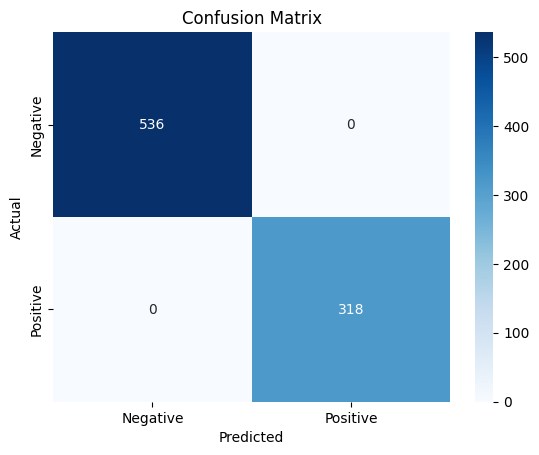

In [49]:
y_pred = model.predict(X_test)  # Predict labels for test set
y_pred = (model.predict_proba(X_test)[:, 1] > 0.5).astype(int)  # For binary classification
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
